# Clustering using Zillow Data

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# general
import pandas as pd
import numpy as np

# explore/ stat
import scipy.stats as stats

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

# support modules
from env import host, user, password
import acquire
import summarize
import prepare
import explore

In [2]:
# acquire data, only retreive 261 > single residential family
df = acquire.get_zillow_data().set_index("parcelid")

In [3]:
# remove unit counts of two and three
df = df [(df.unitcnt != 2) | (df.unitcnt != 3)]

In [4]:
df.head()

,county,tax_rate,id,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,basementsqft,bathroomcnt,bedroomcnt,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,typeconstructiontypeid,typeconstructiondesc,censustractandblock,transactiondate,logerror,transactions
parcelid,,,,,,,,,,,,,,,,,,,,,
17052889,Ventura,0.01,1387261,nan,None,nan,None,nan,1.00,2.00,...,"376,000.00","5,672.48",None,nan,nan,None,"61,110,010,023,006.00",2017-01-01,0.06,1
17110996,Ventura,0.01,43675,nan,None,nan,None,nan,2.50,3.00,...,"99,028.00","2,204.84",None,nan,nan,None,"61,110,050,041,163.00",2017-01-02,0.01,1
17134185,Ventura,0.01,2490820,nan,None,nan,None,nan,2.00,4.00,...,"273,509.00","4,557.52",None,nan,nan,None,"61,110,055,042,000.00",2017-01-03,0.06,1
17292247,Ventura,0.02,269618,nan,None,nan,None,nan,2.00,3.00,...,"24,808.00","1,450.06",None,nan,nan,None,"61,110,059,063,018.00",2017-01-03,-0.42,1
17141654,Ventura,0.01,74982,nan,None,nan,None,nan,3.00,4.00,...,"126,138.00","4,139.18",None,nan,nan,None,"61,110,053,061,004.00",2017-01-03,-0.02,1


In [5]:
df.shape

(52169, 71)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tax_rate,"52,164.00",0.01,0.01,0.00,0.01,0.01,0.01,0.82
id,"52,169.00","1,496,932.46","859,434.15",349.00,"757,739.00","1,500,051.00","2,241,574.00","2,982,270.00"
airconditioningtypeid,"13,605.00",2.44,3.85,1.00,1.00,1.00,1.00,13.00
architecturalstyletypeid,70.00,7.10,2.67,2.00,7.00,7.00,7.00,21.00
basementsqft,47.00,678.98,711.83,38.00,263.50,512.00,809.50,"3,560.00"
bathroomcnt,"52,169.00",2.31,1.02,1.00,2.00,2.00,3.00,18.00
bedroomcnt,"52,169.00",3.31,0.93,1.00,3.00,3.00,4.00,14.00
buildingqualitytypeid,"33,628.00",6.27,1.72,1.00,5.00,6.00,8.00,12.00
calculatedbathnbr,"52,153.00",2.31,1.02,1.00,2.00,2.00,3.00,18.00
calculatedfinishedsquarefeet,"52,161.00","1,923.74","1,003.72",152.00,"1,268.00","1,660.00","2,306.00","21,929.00"


In [7]:
summarize.df_summary(df)

--- Shape: (52169, 71)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52169 entries, 17052889 to 14447871
Data columns (total 71 columns):
county                          52169 non-null object
tax_rate                        52164 non-null float64
id                              52169 non-null int64
airconditioningtypeid           13605 non-null float64
airconditioningdesc             13605 non-null object
architecturalstyletypeid        70 non-null float64
architecturalstyledesc          70 non-null object
basementsqft                    47 non-null float64
bathroomcnt                     52169 non-null float64
bedroomcnt                      52169 non-null float64
buildingclasstypeid             0 non-null object
buildingclassdesc               0 non-null object
buildingqualitytypeid           33628 non-null float64
calculatedbathnbr               52153 non-null float64
calculatedfinishedsquarefeet    52161 non-null float64
decktypeid                      387 non-null flo

   num_cols_missing    pct_cols_missing  parcelid
0                23    32.3943661971831         2
1                24   33.80281690140845        12
2                25    35.2112676056338        11
3                26   36.61971830985916        30
4                27  38.028169014084504       177
5                28  39.436619718309856       389
6                29  40.845070422535215      2527
7                30   42.25352112676056      2194
8                31   43.66197183098591      5986
9                32   45.07042253521127      8880
10               33  46.478873239436616     11960
11               34   47.88732394366197     11151
12               35   49.29577464788733      3459
13               36   50.70422535211267      4121
14               37  52.112676056338024      1016
15               38   53.52112676056338       214
16               39  54.929577464788736        22
17               40   56.33802816901409        13
18               41   57.74647887323944         3


In [8]:
summarize.nulls_by_col(df)

,num_rows_missing,pct_rows_missing
county,0,0.00
tax_rate,5,0.00
id,0,0.00
airconditioningtypeid,38564,0.74
airconditioningdesc,38564,0.74
architecturalstyletypeid,52099,1.00
architecturalstyledesc,52099,1.00
basementsqft,52122,1.00
bathroomcnt,0,0.00
bedroomcnt,0,0.00


In [9]:
summarize.nulls_by_row(df)

,num_cols_missing,pct_cols_missing,parcelid
0,23,32.3943661971831,2
1,24,33.80281690140845,12
2,25,35.2112676056338,11
3,26,36.61971830985916,30
4,27,38.028169014084504,177
5,28,39.436619718309856,389
6,29,40.845070422535215,2527
7,30,42.25352112676056,2194
8,31,43.66197183098591,5986
9,32,45.07042253521127,8880


**This function deals with missing values in the columns and the rows. If a row has more than 50% nulls, they will be removed. If a columns has more than 75% nulls, they will be removed.**

In [3]:
df = prepare.handle_missing_values(df, prop_required_column = .5, prop_required_row = .75)

After using this function, we didn't lose any rows, but we lost a lot of columns.

In [11]:
df.shape

(52168, 37)

In [12]:
# summarize.report_remain_nulls_by_col(df, num_rows_of_interest)
summarize.report_remain_nulls_by_col(df, 200)

,num_rows_missing,pct_rows_missing
buildingqualitytypeid,18540,0.36
heatingorsystemtypeid,18344,0.35
heatingorsystemdesc,18344,0.35
lotsizesquarefeet,354,0.01
propertyzoningdesc,18478,0.35
regionidcity,1028,0.02
unitcnt,18450,0.35


In [4]:
# 1st feature construction
df['age'] = 2017 - df.yearbuilt

In [5]:
df = df.drop(columns = ['yearbuilt','propertylandusedesc','propertylandusetypeid','fullbathcnt','state','calculatedbathnbr','id','finishedsquarefeet12', 'buildingqualitytypeid', 'heatingorsystemtypeid', 'heatingorsystemdesc', 'propertyzoningdesc', 'propertyzoningdesc', 'unitcnt'])
# now we can start impute and handle outlier

In [15]:
df.shape

(52168, 25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a233bb390>,
      dtype=object)

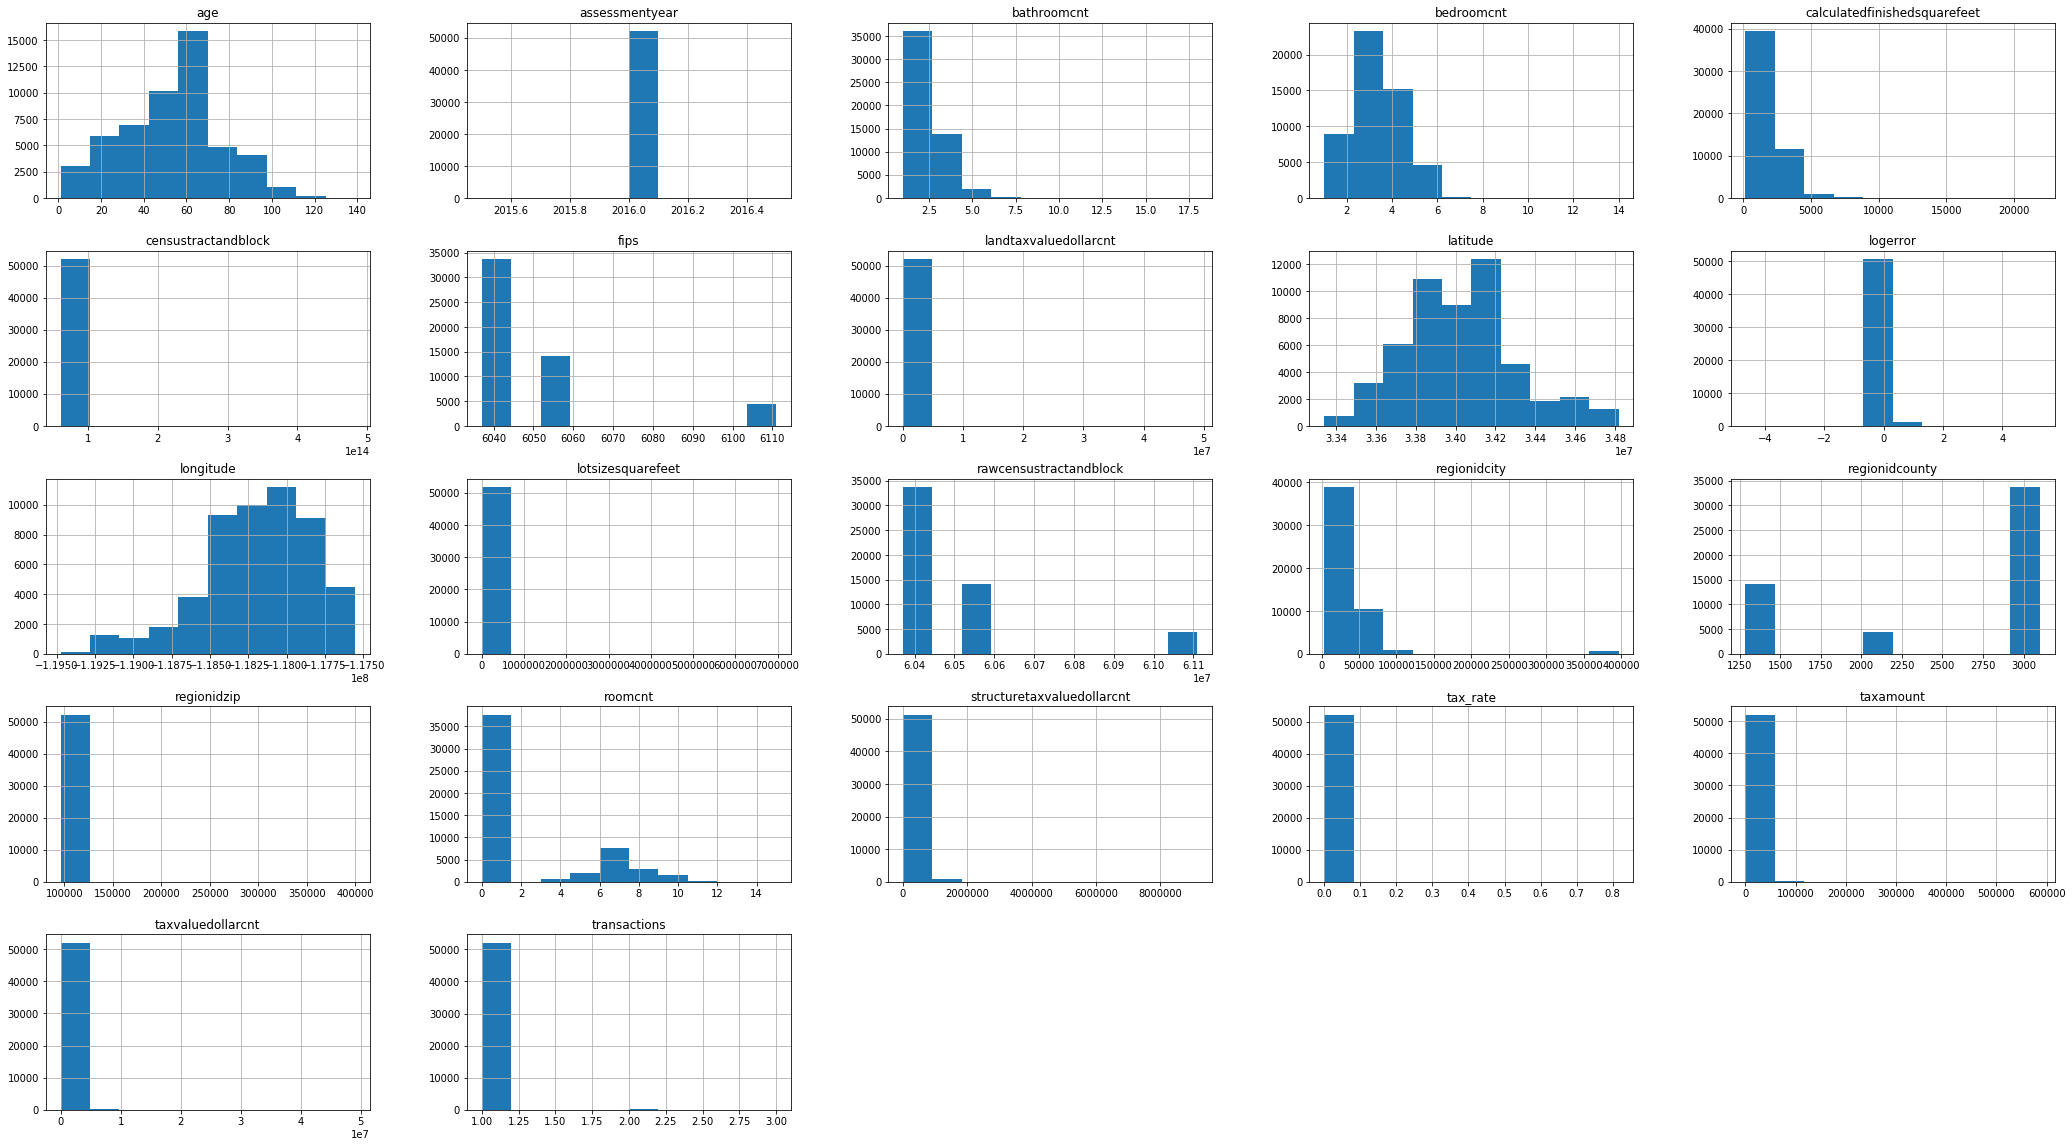

In [8]:
df.hist(figsize=(36,20))

In [ ]:
# rm outlier
df = prepare.remove_outliers_iqr(df, col_out)

In [12]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        #q75, q25 = np.percentile(df[col], [75,25])

        q1, q3 = col.quantile([.25, .75])
        iqr = q3 - q1
        ub = q3 + k * iqr
        lb = q1 - k * iqr
        
        df = df[df[col] <= ub]
        df = df[df[col] >= lb]
    return df

In [13]:
col_out = ["tax_rate", "bathroomcnt", "bedroomcnt","calculatedfinishedsquarefeet", "lotsizesquarefeet", "roomcnt", "taxamount"]

In [33]:
df = remove_outliers_iqr(df, "tax_rate")
df = remove_outliers_iqr(df, "bathroomcnt")
df = remove_outliers_iqr(df, "bedroomcnt")
df = remove_outliers_iqr(df, "calculatedfinishedsquarefeet")
df = remove_outliers_iqr(df, "lotsizesquarefeet")
df = remove_outliers_iqr(df, "roomcnt")
df = remove_outliers_iqr(df, "taxamount")

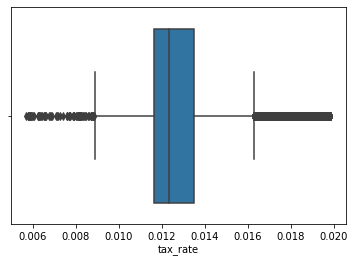

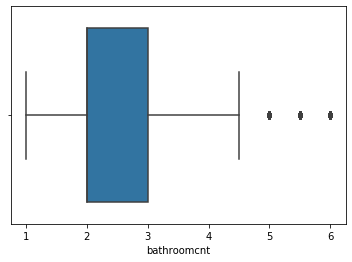

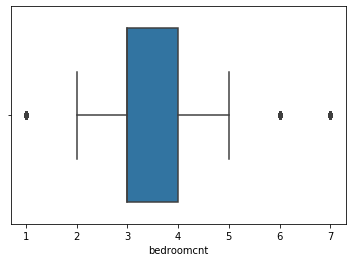

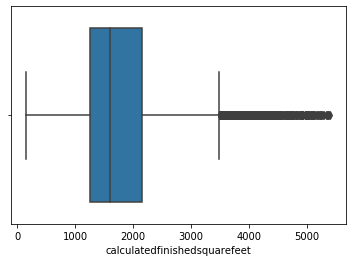

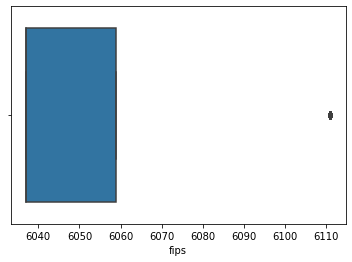

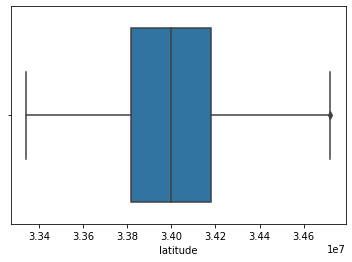

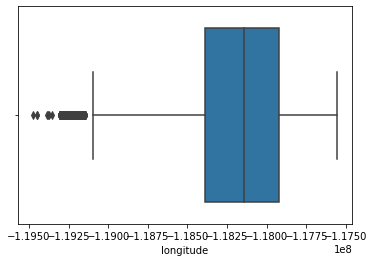

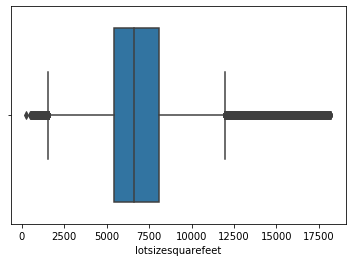

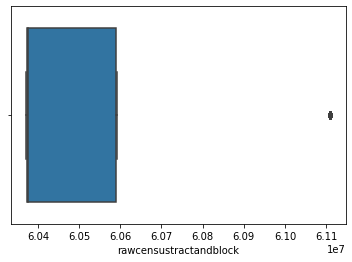

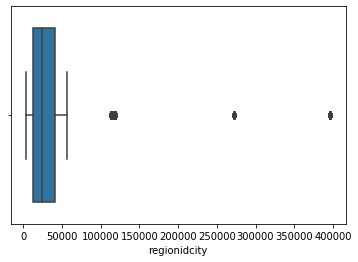

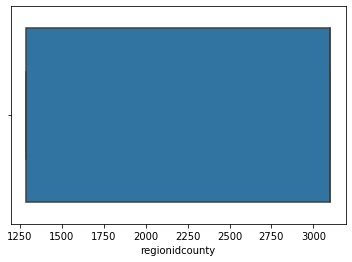

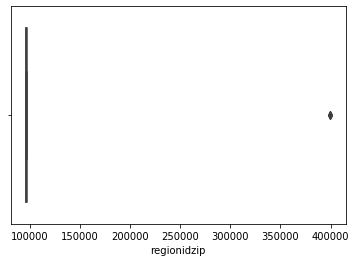

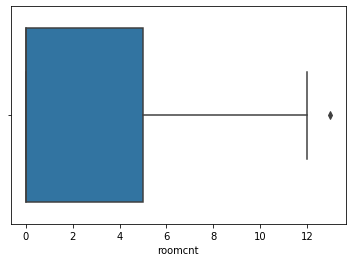

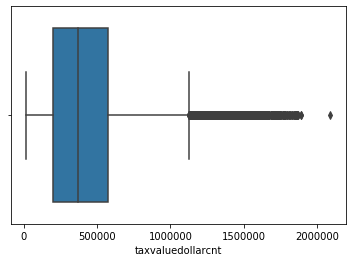

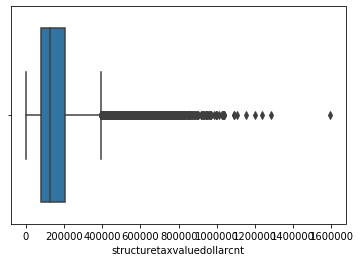

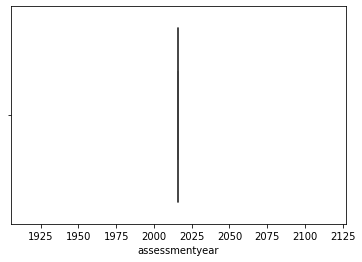

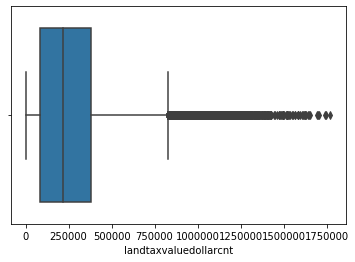

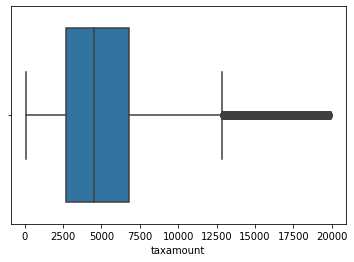

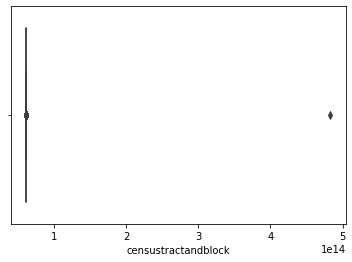

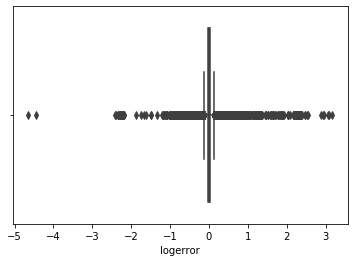

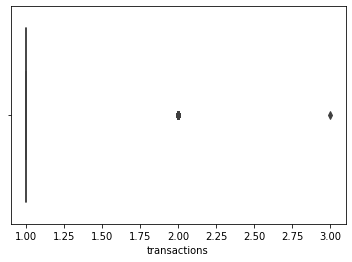

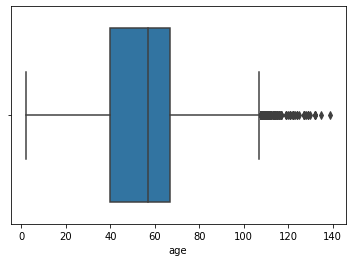

In [34]:
# validate outlier removal
# visualize the columns with boxplot
# identify outliers visually
explore.df_feature_box(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2187c7f0>,
      dtype=object)

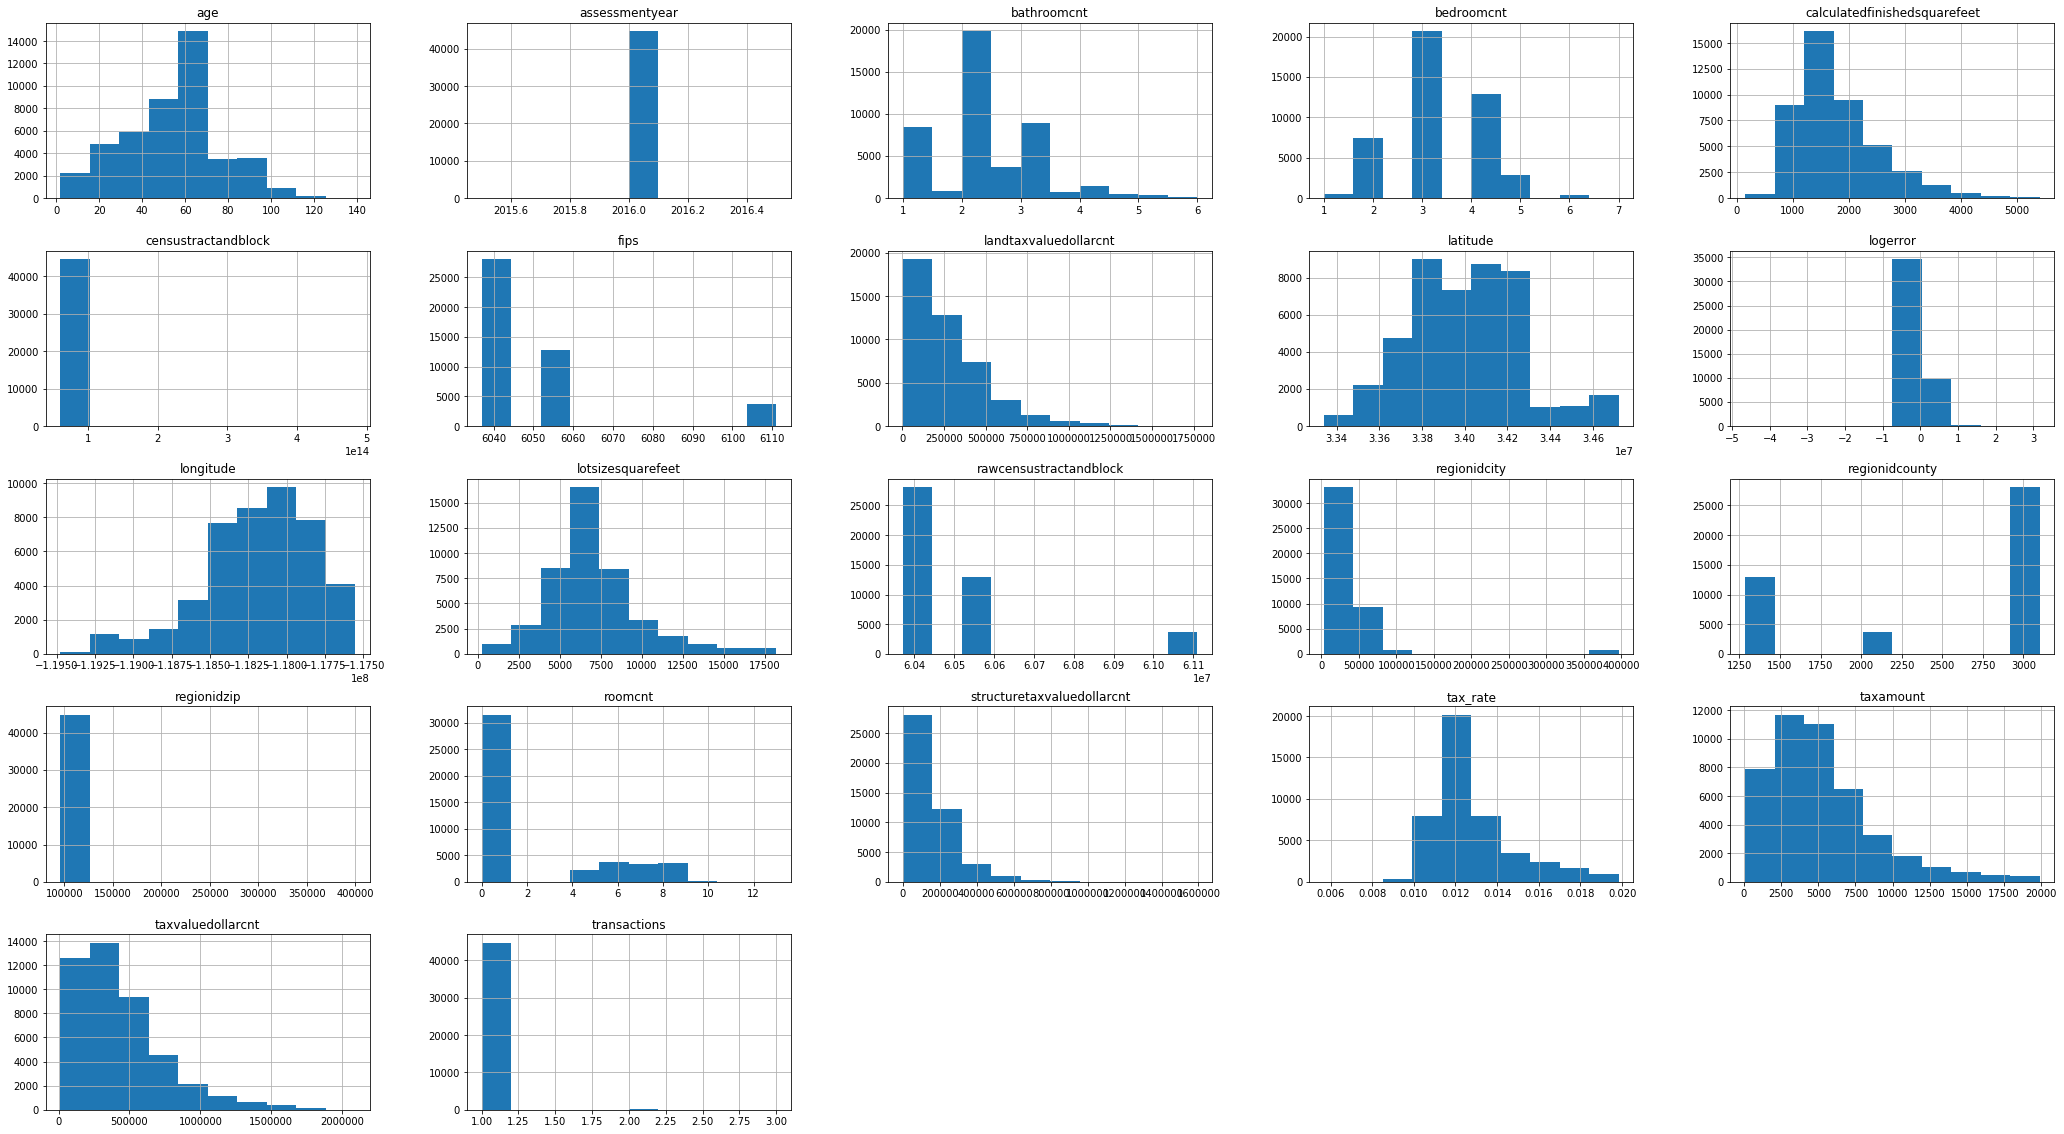

In [35]:
df.hist(figsize=(36,20))

In [17]:
col_impute_mean = ['tax_rate', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 
                   'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

col_impute_mode = ['regionidcity', 'regionidzip','censustractandblock']

In [18]:
train, test = prepare.split_my_data(df)

In [19]:
train, test = prepare.impute(train, test, "mean", col_impute_mean)
train, test = prepare.impute(train, test, "most_frequent", col_impute_mode)

In [20]:
print(df.shape)
print(train.shape)
print(test.shape)

(52168, 25)
(40548, 25)
(10138, 25)


In [21]:
df = pd.concat([train,test])

In [22]:
print(df.shape)
print(train.shape)
print(test.shape)

(50686, 25)
(40548, 25)
(10138, 25)


In [23]:
# impute
# lotsizesquarefeet > mean/ median
# regionidcity > most freq

In [26]:
print(df.shape)
print(train.shape)
print(test.shape)

(43724, 25)
(40548, 25)
(10138, 25)


In [28]:
df["transactions"] = df.transactions.astype("float")

df["bedroomcnt"] = df.bedroomcnt.astype("int")
df["roomcnt"] = df.roomcnt.astype("int")

df["fips"] = df.fips.astype("object")
df["regionidcity"] = df.regionidcity.astype("object")
df["regionidcounty"] = df.regionidcounty.astype("object")
df["regionidzip"] = df.regionidzip.astype("object")
df["assessmentyear"] = df.assessmentyear.astype("object")

In [29]:
print(df.shape)
print(train.shape)
print(test.shape)

(43724, 25)
(40548, 25)
(10138, 25)


The 'heatingorsystemtypeid', 'heatingorsystemdesc' and 'propertyzoningdesc' have significantly less values than the other values, but not so much so that they were removed with the function. We will just take note of this if we need to reference that leter on.

In [30]:
def df_feature_dist(df):
    # get a list of columns where content is number
    features_num = list(df.select_dtypes(np.number).columns)
    for feature in features_num:
        sns.distplot(df[feature].dropna())
        plt.show()

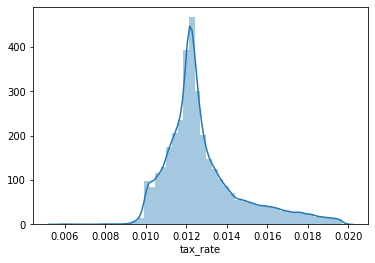

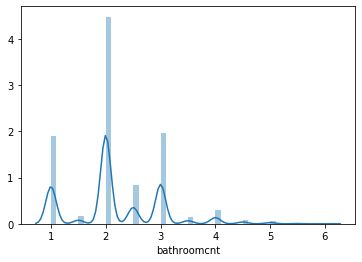

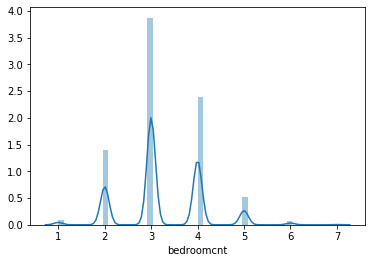

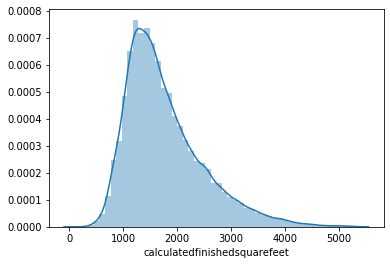

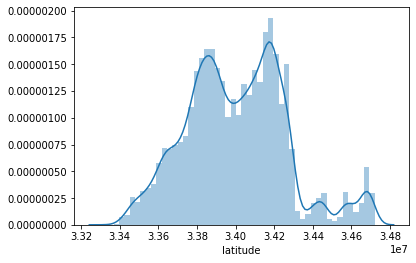

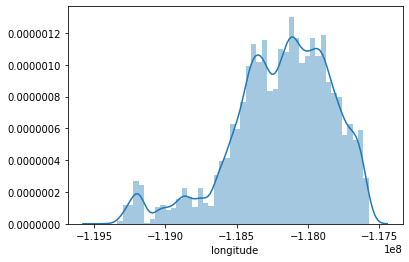

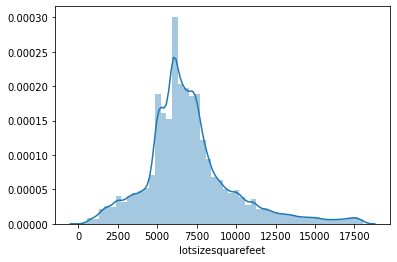

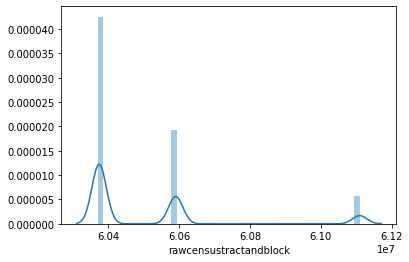

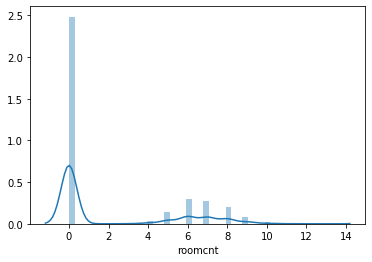

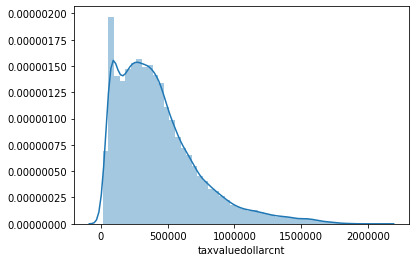

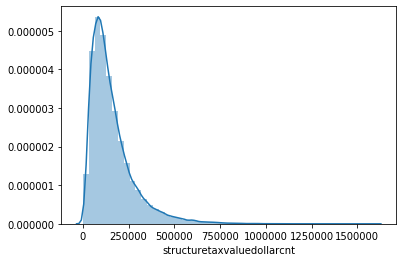

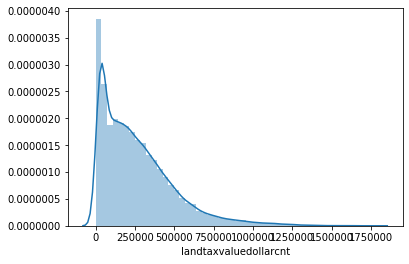

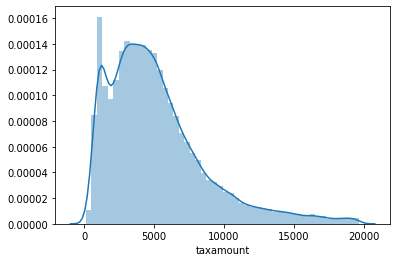

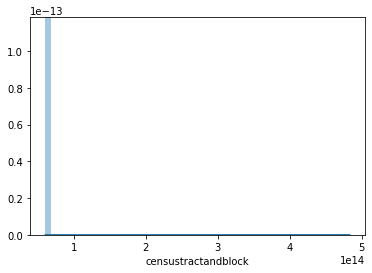

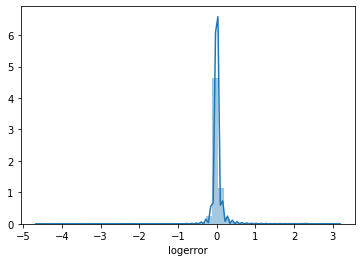

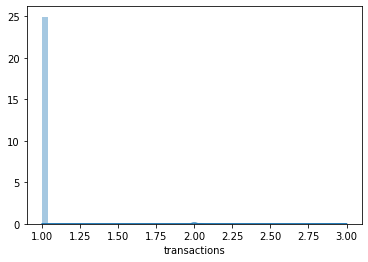

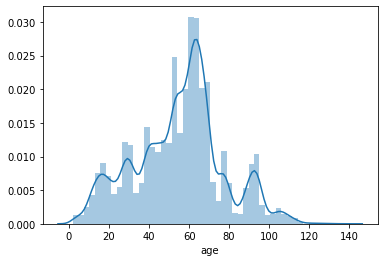

In [31]:
df_feature_dist(df)